In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
df = pd.read_csv('./bank.csv')

In [144]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [145]:
df.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

From using the `.head()` and `.tail()` methods, We can see that the dataframe has 2000 data rows. 

In [146]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

I can draw from using the `.describe()` method that:
age (2000 - 1988) 12 missing values. 

The question I want to try to answer is:
 
`Q: Is there a relationship between being over the age of 60 and if they subscribed to the term loan.`

<AxesSubplot:>

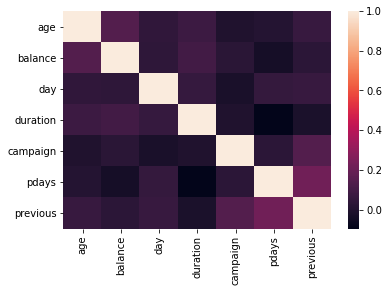

In [147]:
sns.heatmap(df.corr())

The heat map suggest correlation greater than 0 between `age` and the 4 attributes `balance`, `duration`, `campaign`.

I can find out more information on the pairwise distribution between `age`, `balance`, `duration`, `campaign` on a pairplot.

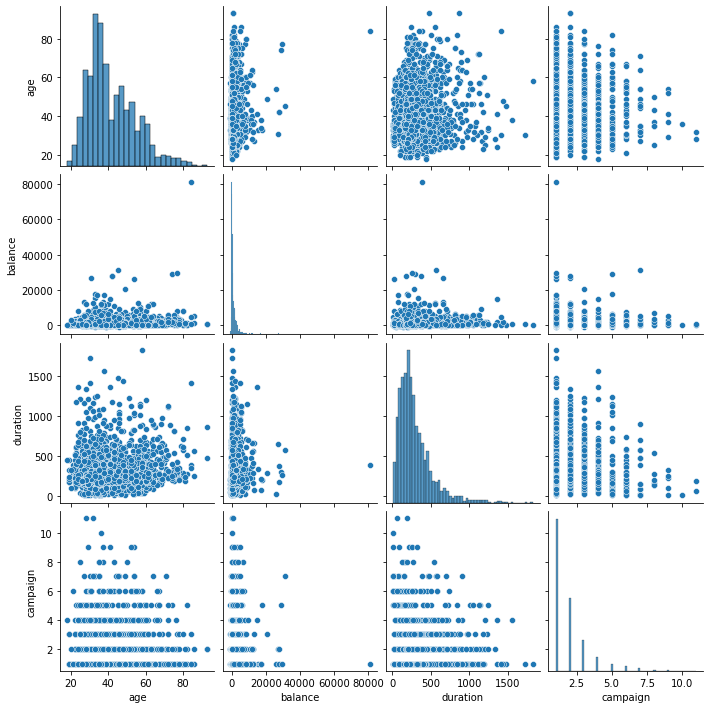

In [148]:
sns.pairplot(data=df[['age','balance','duration','campaign']].dropna())
plt.show()

From the pairplot I can draw these conclusions:



In [149]:
df['age'].count()

1988

There are 12 missing values in column `age.`

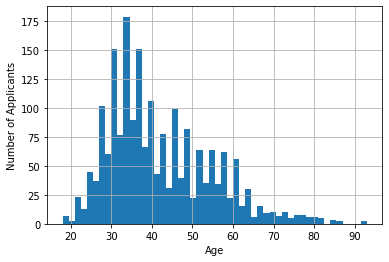

In [150]:
df['age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Number of Applicants')
plt.show()

From the histogram above, I can see that the majority of clients are between the age `range of 30-40` and has less clients over the age of 40.

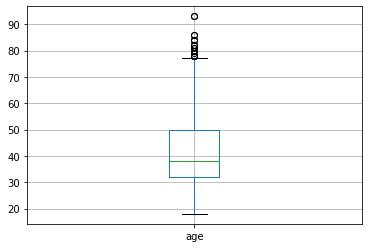

In [151]:
df.boxplot(column='age')
plt.show()

The box plot confirms that there are a lot of outliers/extreme values and the data is left-skewed. This may indicate that the majority of people contacted were working class and younger. 

I will investigate further into the outliers.

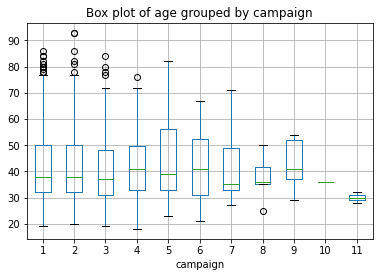

In [152]:
df.boxplot(column='age', by='campaign')
plt.title('Box plot of age grouped by campaign')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

As we can see from the box plots above, the majority of outliers/extreme values were only contacted `1-4` times during the campaign. 

This could indicate that they subscribed to the term loan. 

This will be looked into further once I investigate the `categorical data`.

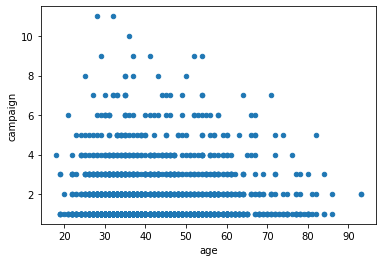

In [153]:
df.plot.scatter(x='age', y='campaign')
plt.show()

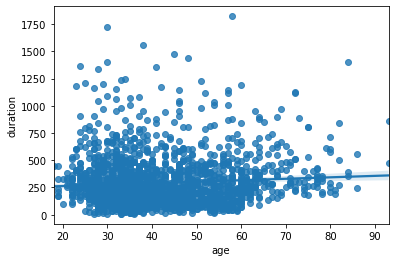

In [154]:
sns.regplot(data=df, x='age', y='duration')
plt.show()

From the `scatter` and `Seaborns regplot` I can see that the clients aged between `30-60` were contacted more frequently than those above. 

I can also see that the `duration for those calls tend to be higher` too. This could imply more information being given and the client hearing more about the term loan. Given a better chance for them to sign up. 

I can also see that clients over the age of 60 tended to have longer call durations. 
I will invesitigate this later when I compare `age against if they signed up or not`. 


In [155]:
frequency_table = df['subscribed'].value_counts(ascending=True)
print('Frequency Table for Subscription History:') 
print(frequency_table)

Frequency Table for Subscription History:
yes    1000
no     1000
Name: subscribed, dtype: int64


From the `Frequency Table`, I can see that 1000 clients said `yes` to the subscription and 1000 clients said `no`.

I will investigate how many of those who said yes were over the age of 60.

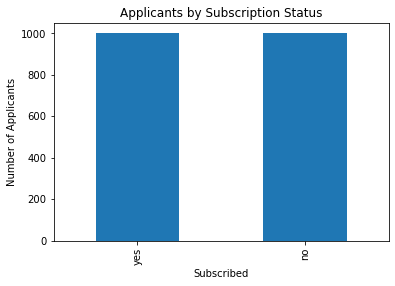

In [114]:
# Plot the frequency table for Credit_History
frequency_table.plot(kind='bar')
plt.xlabel('Subscribed')
plt.ylabel('Number of Applicants')
plt.title('Applicants by Subscription Status')
plt.show()

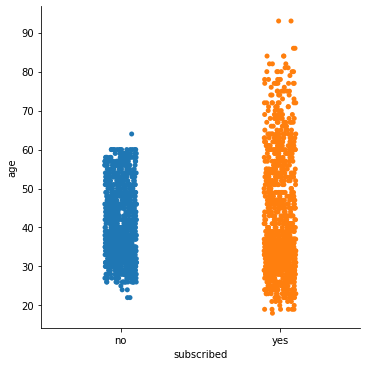

In [115]:
sns.catplot(x="subscribed", y="age", data=df)

In [120]:
count = 0
for index, row in df.iterrows():
    if(row['age'] >= 60 and row['subscribed'] == 'yes'):
        count = count + 1
print(count)

189


There is `203` people over the age of 60 in the data.
`189` of these said yes. 



In [117]:
#Calculate percentage of over 60's that said yes to the term loan
print((189/203) * 100)

93.10344827586206


In [118]:
#calculate percentage people over 60 saying yes to the term loan
print((189/1000) * 100)

18.9


In [122]:
#calculate number of clients in age range 20-60 and said yes to the term loan
count = 0
for index, row in df.iterrows():
    if(row['age'] < 60 and row['age'] >= 20 and row['subscribed'] == 'yes'):
        count = count + 1
print(count)

801


In [123]:
#calculate number of clients in age range 20-60
count = 0
for index, row in df.iterrows():
    if(row['age'] < 60 and row['age'] >= 20):
        count = count + 1
print(count)

1778


In [126]:
#calculate percentage of clients between 20 and 60 and saying yes to the term loan
print((801/1778) * 100)

45.05061867266591


Being `over 60` and saying `yes` to the term loan makes up `18.9%` of the clients who said yes to the term loan.

I can deduce out of those being `over the age of 60`, approximately `93%` of these clients subscribed to the term loan.

I can also deduce that out of all the clients in the age range 20-60, only 45% of them said yes to the term loan.

This implies to me that the higher age range has a higher percentage of signing up for the term loan.

This means that `there is a relationship` between being `over the age of 60` and `subscribing to the loan`, even though there was only 203 clients that met this criteria, It was an interesting find through the analysis of the data.